In [502]:
import warnings
import numpy as np
import pandas as pd
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Tune the visual settings for figures in `seaborn`
sns.set_context(
    "notebook", font_scale=1.5, rc={"figure.figsize": (11, 8), "axes.titlesize": 18}
)

from matplotlib import rcParams

rcParams["figure.figsize"] = 11, 8

In [503]:
DATA_PATH = 'https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/data/'
df = pd.read_csv(DATA_PATH + "mlbootcamp5_train.csv", sep=";")

In [504]:
df.shape

(70000, 13)

In [505]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [506]:
for c in df.columns:
    n = df[c].nunique()
    print(c)
    if n <= 3:
        print(n, sorted(df[c].value_counts().to_dict().items()))
    else:
        print(n)
    print(10 * "-")


id
70000
----------
age
8076
----------
gender
2 [(1, 45530), (2, 24470)]
----------
height
109
----------
weight
287
----------
ap_hi
153
----------
ap_lo
157
----------
cholesterol
3 [(1, 52385), (2, 9549), (3, 8066)]
----------
gluc
3 [(1, 59479), (2, 5190), (3, 5331)]
----------
smoke
2 [(0, 63831), (1, 6169)]
----------
alco
2 [(0, 66236), (1, 3764)]
----------
active
2 [(0, 13739), (1, 56261)]
----------
cardio
2 [(0, 35021), (1, 34979)]
----------


In [507]:
# Question 1.1 How many men and women are present in this dataset? 
# Values of the gender feature were not given (whether “1” stands for women or for men) 
# – figure this out by looking analyzing height, making the assumption that men are taller on average.

<AxesSubplot:xlabel='gender', ylabel='height'>

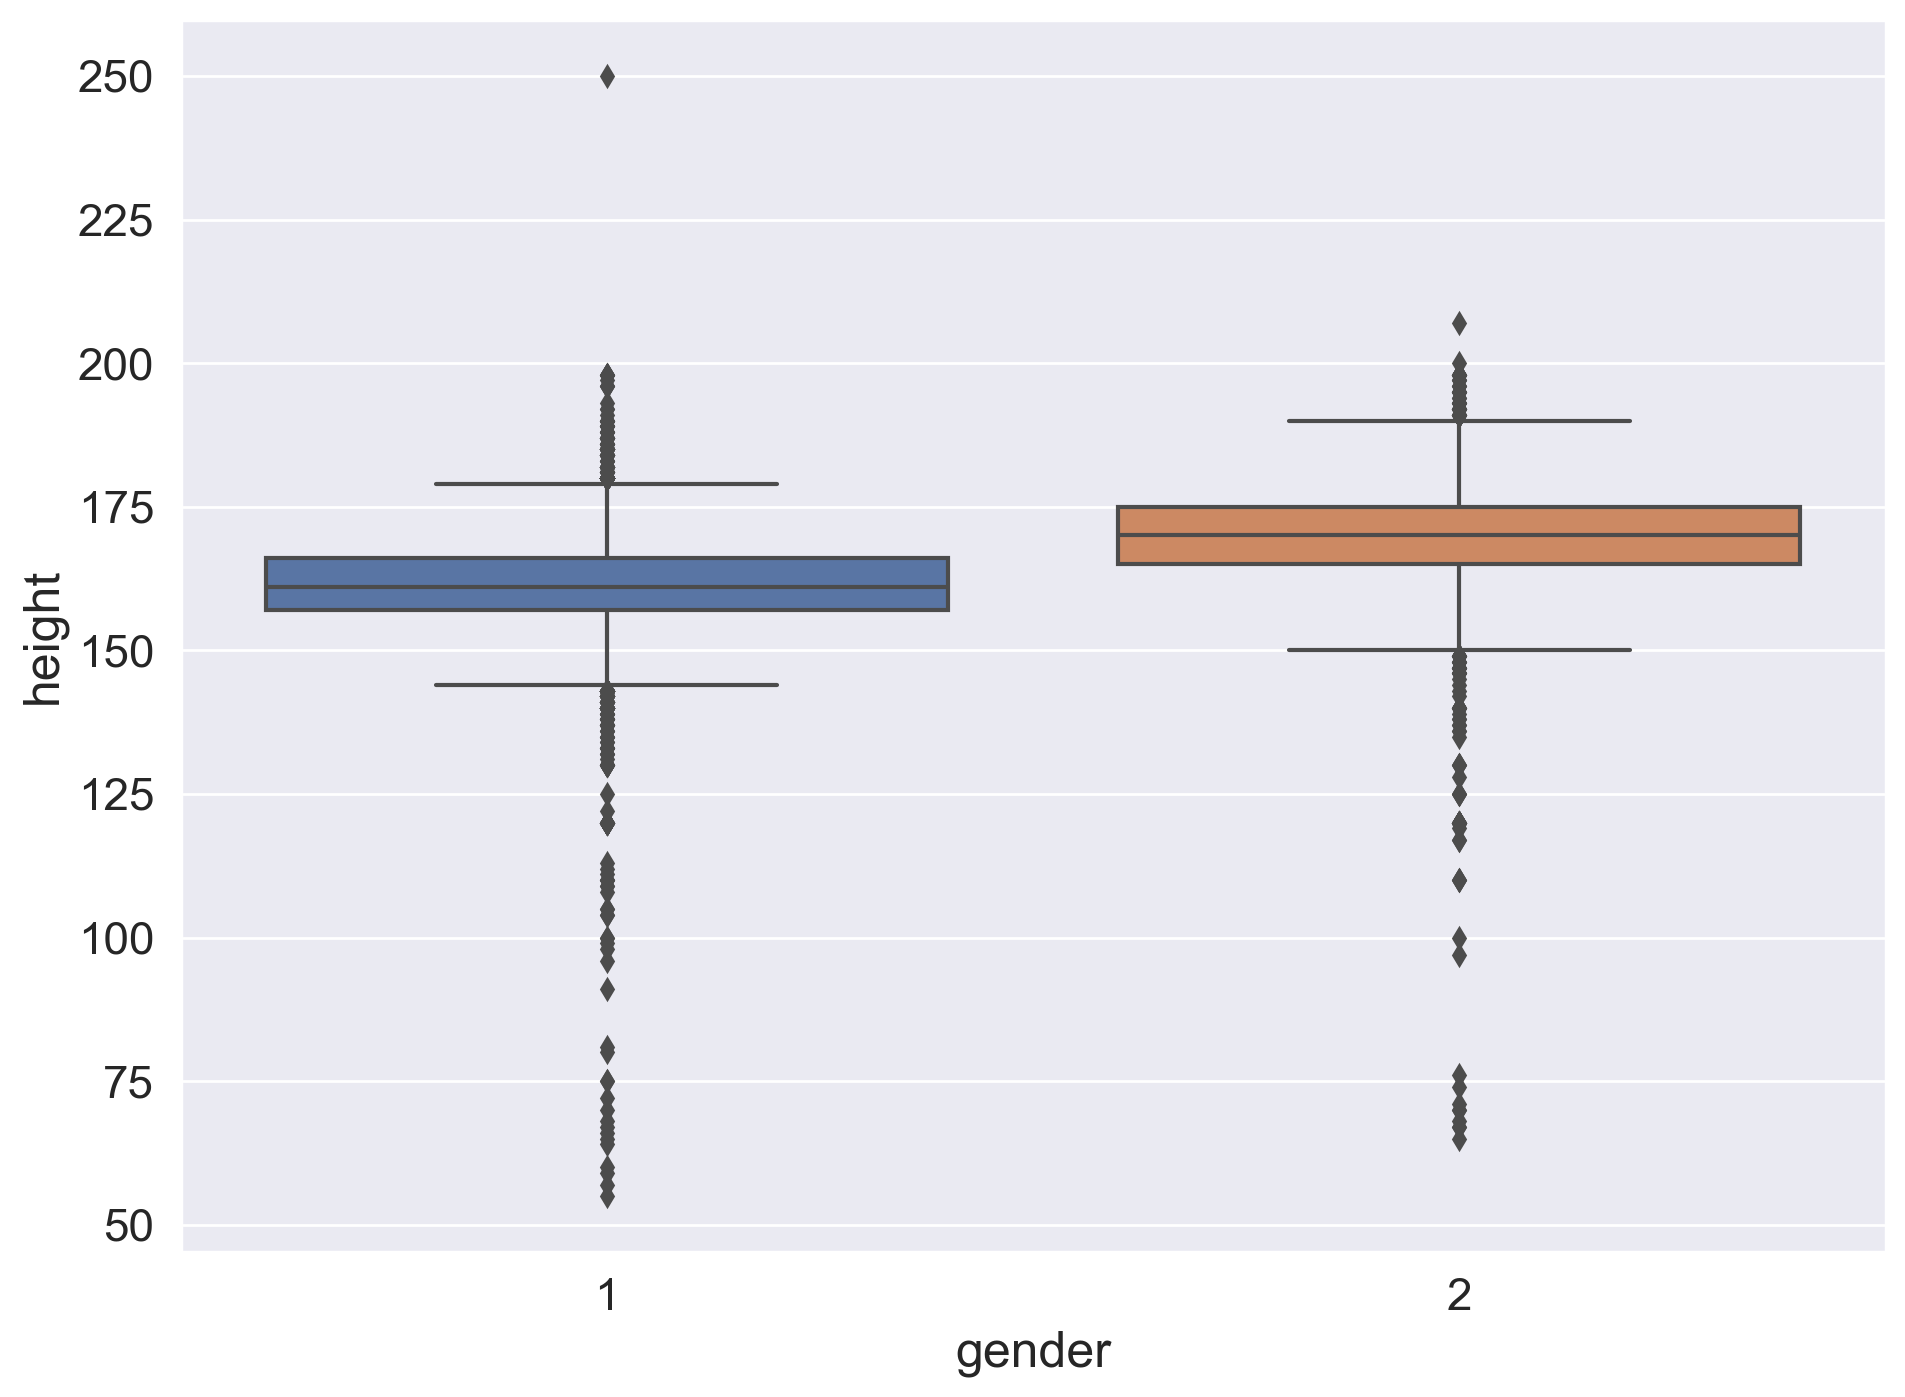

In [508]:
sns.boxplot(x = 'gender', y = 'height', data = df)

In [509]:
#men are taller - gender'2', count: 
print('men: ' + str(len(df[df['gender'] == 2])))
print('women: ' + str(len(df[df['gender'] == 1])))

men: 24470
women: 45530


In [510]:
# Question 1.2 Who more often report consuming alcohol – men or women?

In [511]:
#women alco frequency
df[df['gender'] == 1]['alco'].sum()/len(df[df['gender'] == 1])

0.02549967054689216

In [512]:
#men alco frequency
df[df['gender'] == 2]['alco'].sum()/len(df[df['gender'] == 2])

0.10637515324887617

In [513]:
#men more often

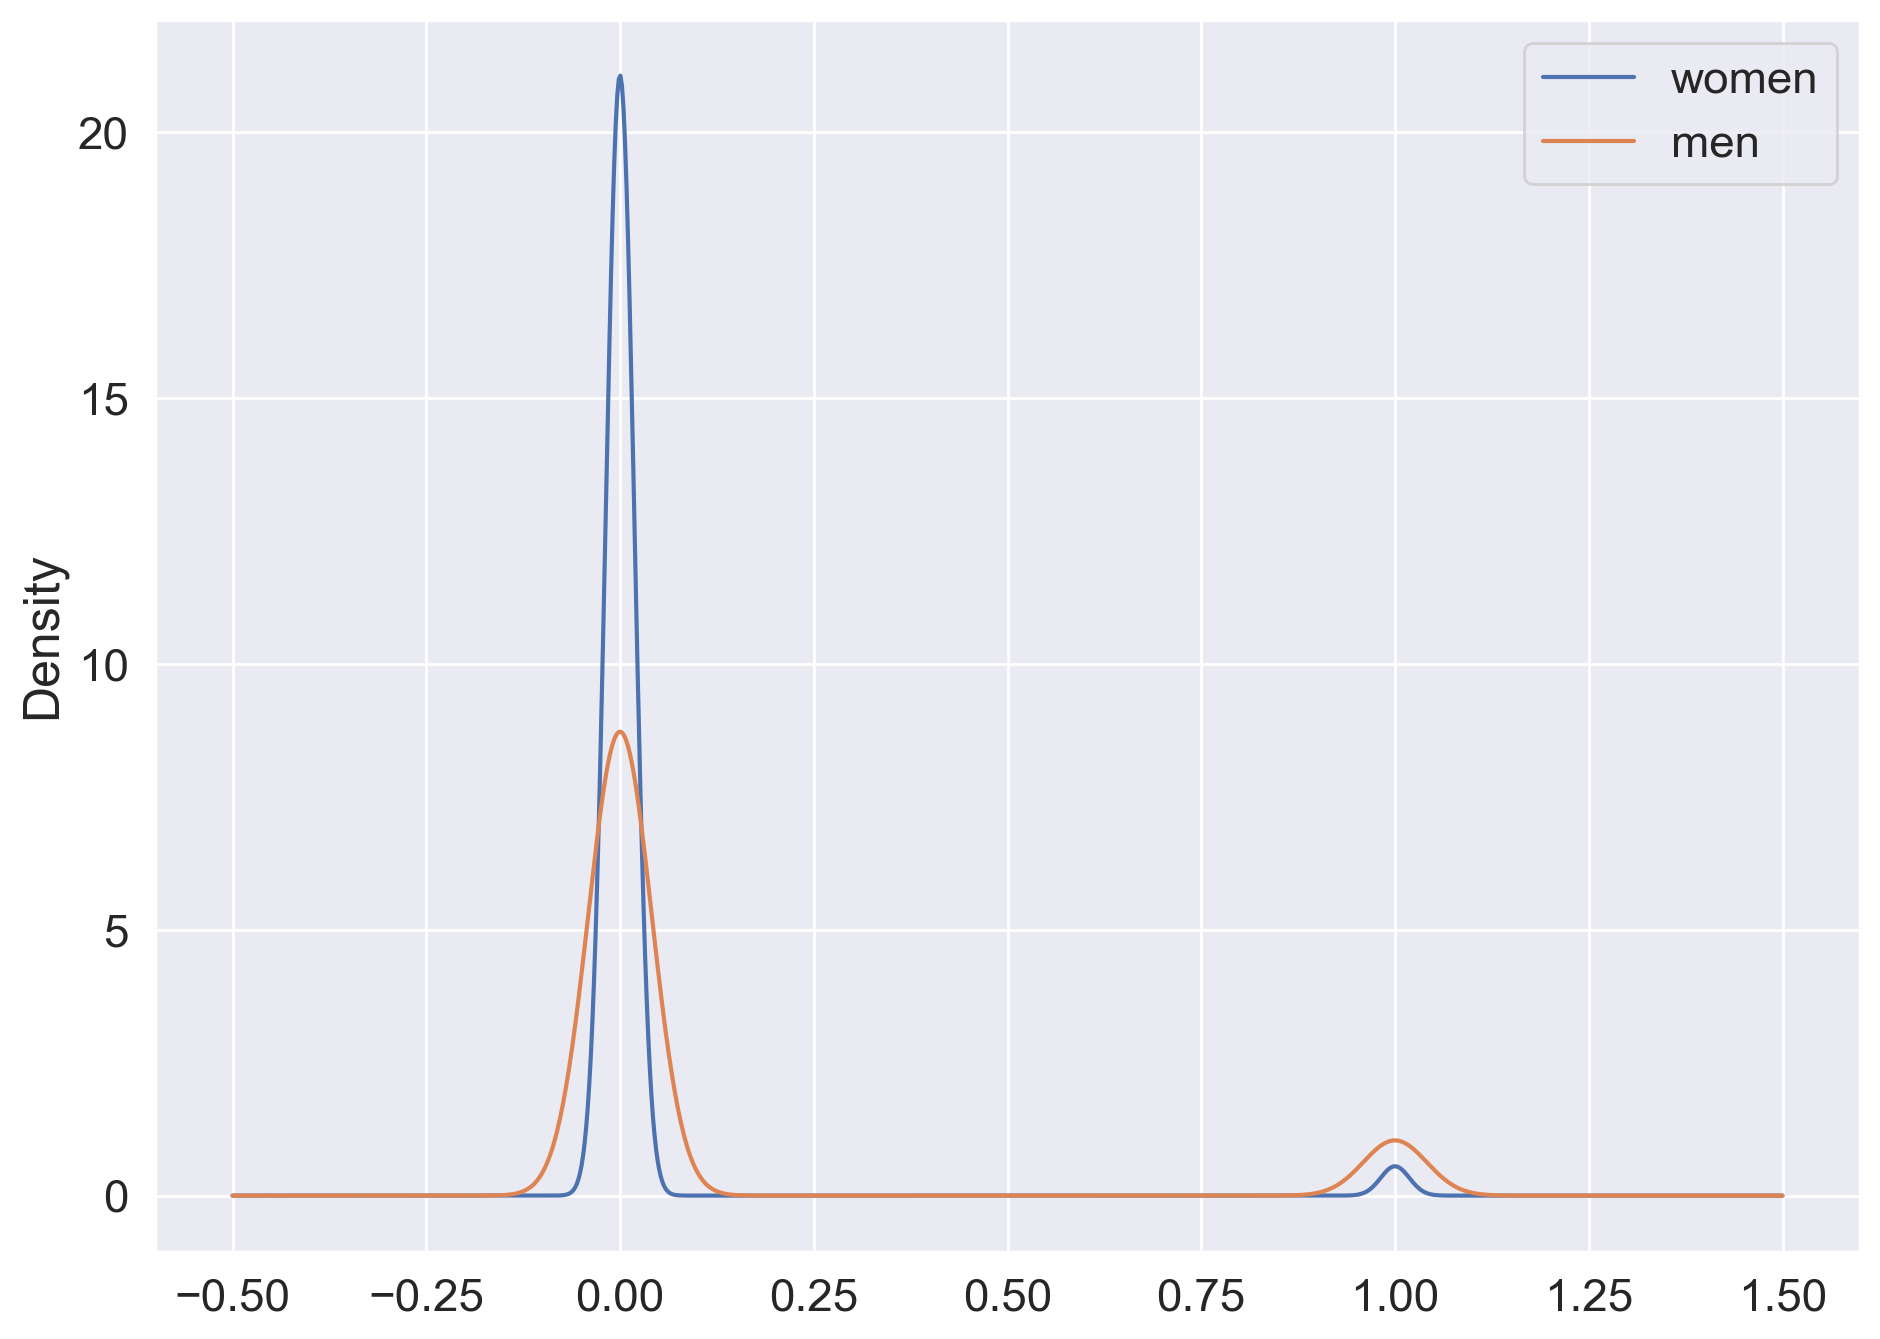

In [514]:
for i in range(1, 3):
    df[df['gender'] == i]['alco'].plot(
        kind="density"
    )
plt.legend(['women', 'men'])

In [515]:
# Question 1.3 What’s the rounded difference between the percentages of smokers among men and women?

In [516]:
#men smokers percentage 
men_smokers = df[df['gender'] == 2]['smoke'].sum()/len(df[df['gender'] == 2])
men_smokers

0.21888026154474868

In [517]:
#men smokers percentage 
women_smokers = df[df['gender'] == 1]['smoke'].sum()/len(df[df['gender'] == 1])
women_smokers

0.017856358444981332

In [518]:
#difference 
round((men_smokers - women_smokers)*100, 1)

20.1

In [519]:
# Question 1.4 What’s the rounded difference between median values of age (in months) 
# for non-smokers and smokers? You’ll need to figure out the units of feature age in this dataset.

In [520]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [521]:
round(df[df['smoke'] == 0]['age'].median()/30 - df[df['smoke'] == 1]['age'].median()/30)

20

In [522]:
# Question 1.5 Calculate fractions of ill people (with CVD) in the two groups of people described in the task. 
# What’s the ratio of these two fractions?

# classification: 
#Calculate age_years feature – round age to the nearest number of years. 
# For this task, select only the people of age 60 to 64, inclusive. 
# Cholesterol level categories differ between the figure and our dataset. 
# The conversion for the cholesterol feature is as follows: 4 mmol/l 1, 5-7 mmol/l 2, 8 mmol/l 3. 

In [523]:
df['age'] = round(df['age']/365)

In [524]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [525]:
more_healthy =  df[(df['age'] >= 60) & (df['age'] <= 64) & (df['gender'] == 2) & (df['smoke'] == 1) & 
(df['ap_hi'] < 120) & (df['cholesterol']) == 1]
frac_more_healthy = more_healthy['cardio'].sum() / len(more_healthy)
frac_more_healthy

0.3118279569892473

In [526]:
less_healthy =  df[(df['age'] >= 60) & (df['age'] <= 64) & (df['gender'] == 2) & (df['smoke'] == 1) & 
(df['ap_hi'] >= 120)][df['cholesterol'] == 3]
frac_less_healthy = less_healthy['cardio'].sum() / len(less_healthy)
frac_less_healthy

0.825

In [527]:
#ratio of these two fractions
round(frac_less_healthy / frac_more_healthy, 2)

2.65

In [528]:
# Create a new feature – BMI (Body Mass Index). To do this, divide weight in kilograms by the square of the height
# in meters. Normal BMI values are said to be from 18.5 to 25.
# Question 1.6 Choose the correct statements:

#1.MedianBMI in the sample is within boundaries of normal values.
#2.Women’s BMI is on average higher then men’s.
#3.Healthy people have higher median BMI than ill people.
#4.In the segment of healthy and non-drinking men BMI is closer to the norm than 
# in the segment of healthy and non-drinking women

In [529]:
#insert bmi 
bmi = df['weight'] / (df['height']/100)**2 
df.insert(loc = len(df.columns),column = 'bmi', value = bmi)

In [530]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [531]:
#prove statements:
print(str(df['bmi'].median()) + '  False')
print(df[df['gender'] == 1]['bmi'].mean() > df[df['gender'] == 2]['bmi'].mean())
print(df[df['cardio'] == 0]['bmi'].median() > df[df['cardio'] == 1]['bmi'].median())
men_segment = df[(df['gender'] == 2) & (df['cardio'] == 0) & (df['alco'] == 0)]['bmi'].mean()
women_segment = df[(df['gender'] == 1) & (df['cardio'] == 0) & (df['alco'] == 0)]['bmi'].mean()
print((men_segment - 25) < (women_segment - 25))

26.374068120774975  False
True
False
True


In [532]:
#Question 1.7 What percent of the original data (rounded) did we filter out in the previous step?

#Filter out the following patient segments (we consider these as erroneous data):

#diastolic pressure is higher than systolic
#height is strictly less than 2.5 percentile (Use pd.Series.quantile to compute this value. If you are not familiar with the function, please read the docs.)
#height is strictly more than 97.5 percentile
#weight is strictly less than 2.5 percentile
#weight is strictly more than 97.5 percentile

In [533]:
#filter data
filter_data = df[(df['ap_hi'] > df['ap_lo']) & (df['height'] >= df['height'].quantile(q=0.025)) & 
(df['height'] <= df['height'].quantile(q=0.975)) & (df['weight'] >= df['weight'].quantile(q=0.025)) & 
(df['weight'] <= df['weight'].quantile(q=0.975))]
filter_data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,54.0,1,172,70.0,130,90,1,1,0,0,1,1,23.661439
69994,99992,58.0,1,165,80.0,150,80,1,1,0,0,1,1,29.384757
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [534]:
#percent that we filter out 
round((len(df) - len(filter_data)) * 100/len(df))

10

In [535]:
#Plot a correlation matrix using heatmap()
#Question 2.1 Which pair of features has the strongest Pearson’s correlation with the gender feature?

In [536]:
df = filter_data

<AxesSubplot:>

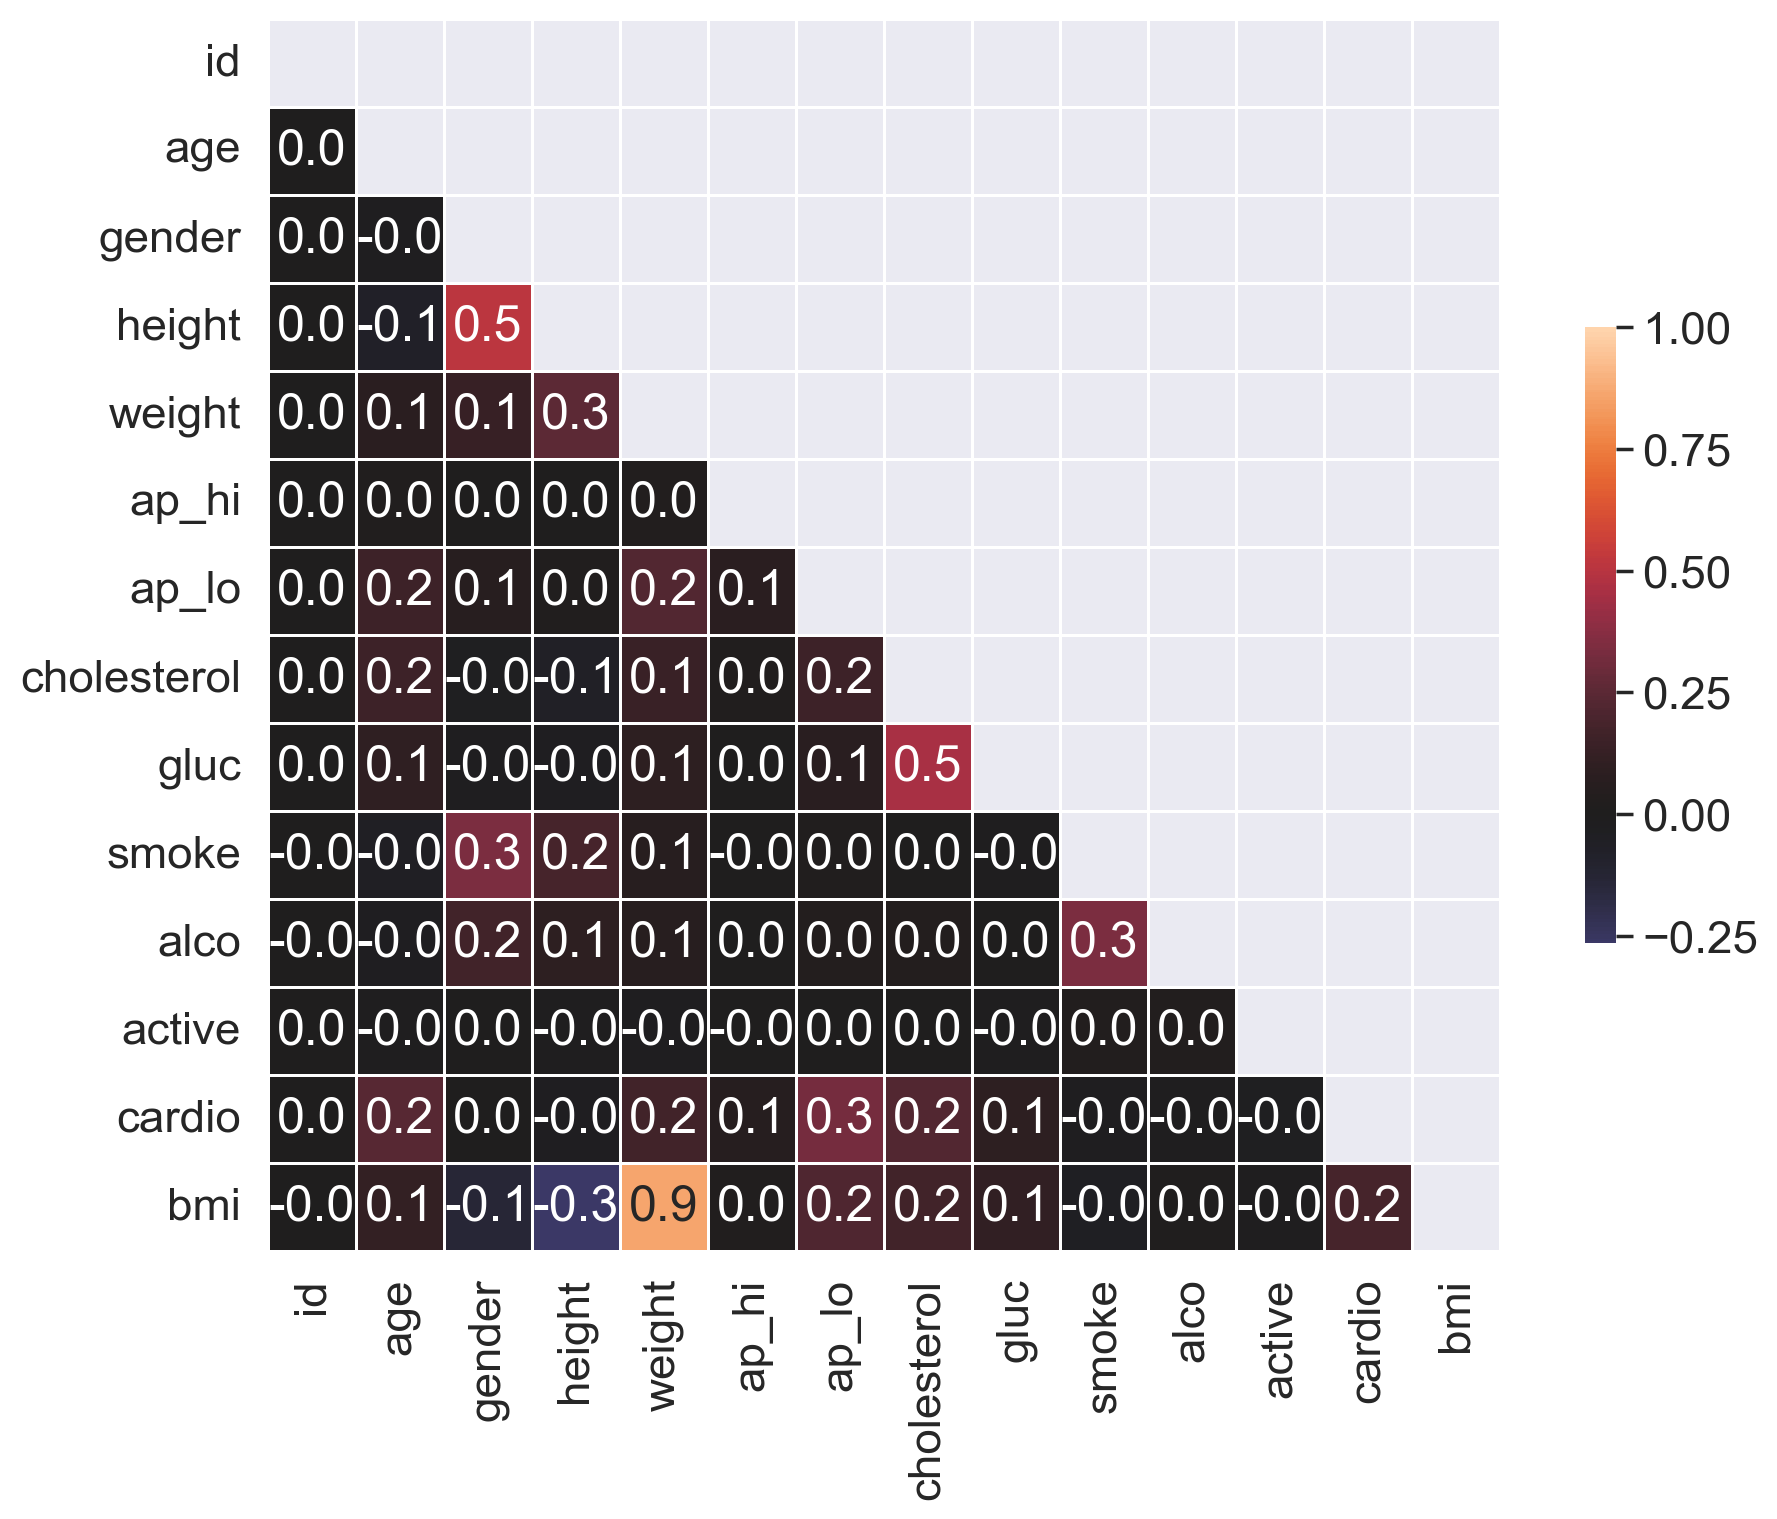

In [537]:
corr_matrix = df.corr(method = 'pearson')
#hide right-triangle(explore similar data)

mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr_matrix,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
#Height, Smoke

In [538]:
#Question 2.2 Which pair of features has the strongest Spearman rank correlation?

<AxesSubplot:>

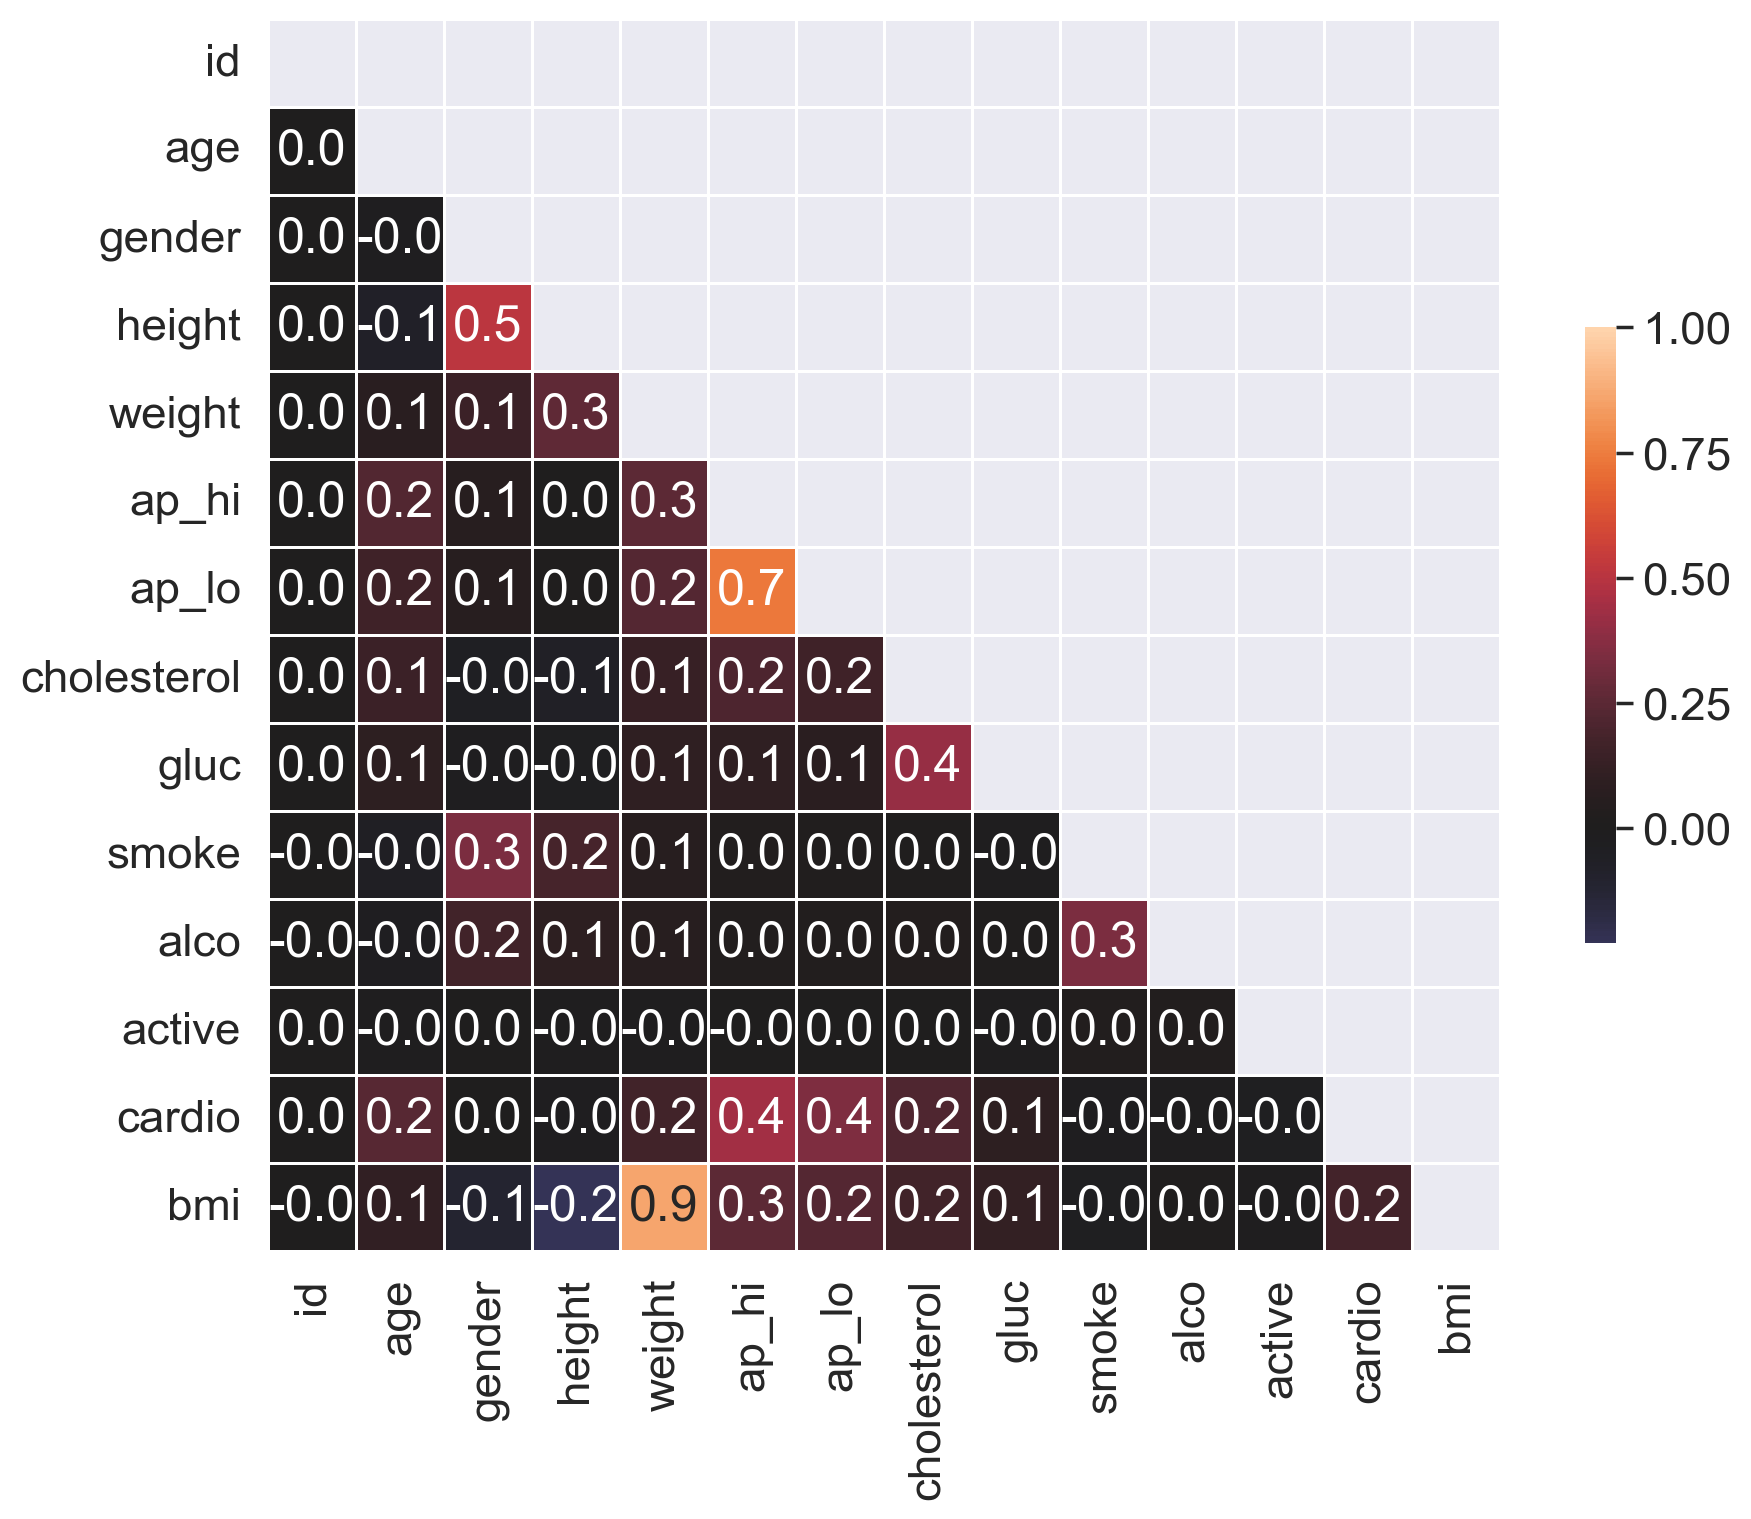

In [539]:
corr_matrix = df.corr(method = 'spearman')
#hide right-triangle(explore similar data)

mask = np.zeros_like(corr_matrix, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(
    corr_matrix,
    mask=mask,
    vmax=1,
    center=0,
    annot=True,
    fmt=".1f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
#Ap_hi, Ap_lo

In [540]:
#Question 2.3 Why do these features have strong rank correlation?
#Nature of the data.

In [541]:
#Question 2.4 What is the smallest age at which the number of people with CVD outnumbers the number of people 
# without CVD?

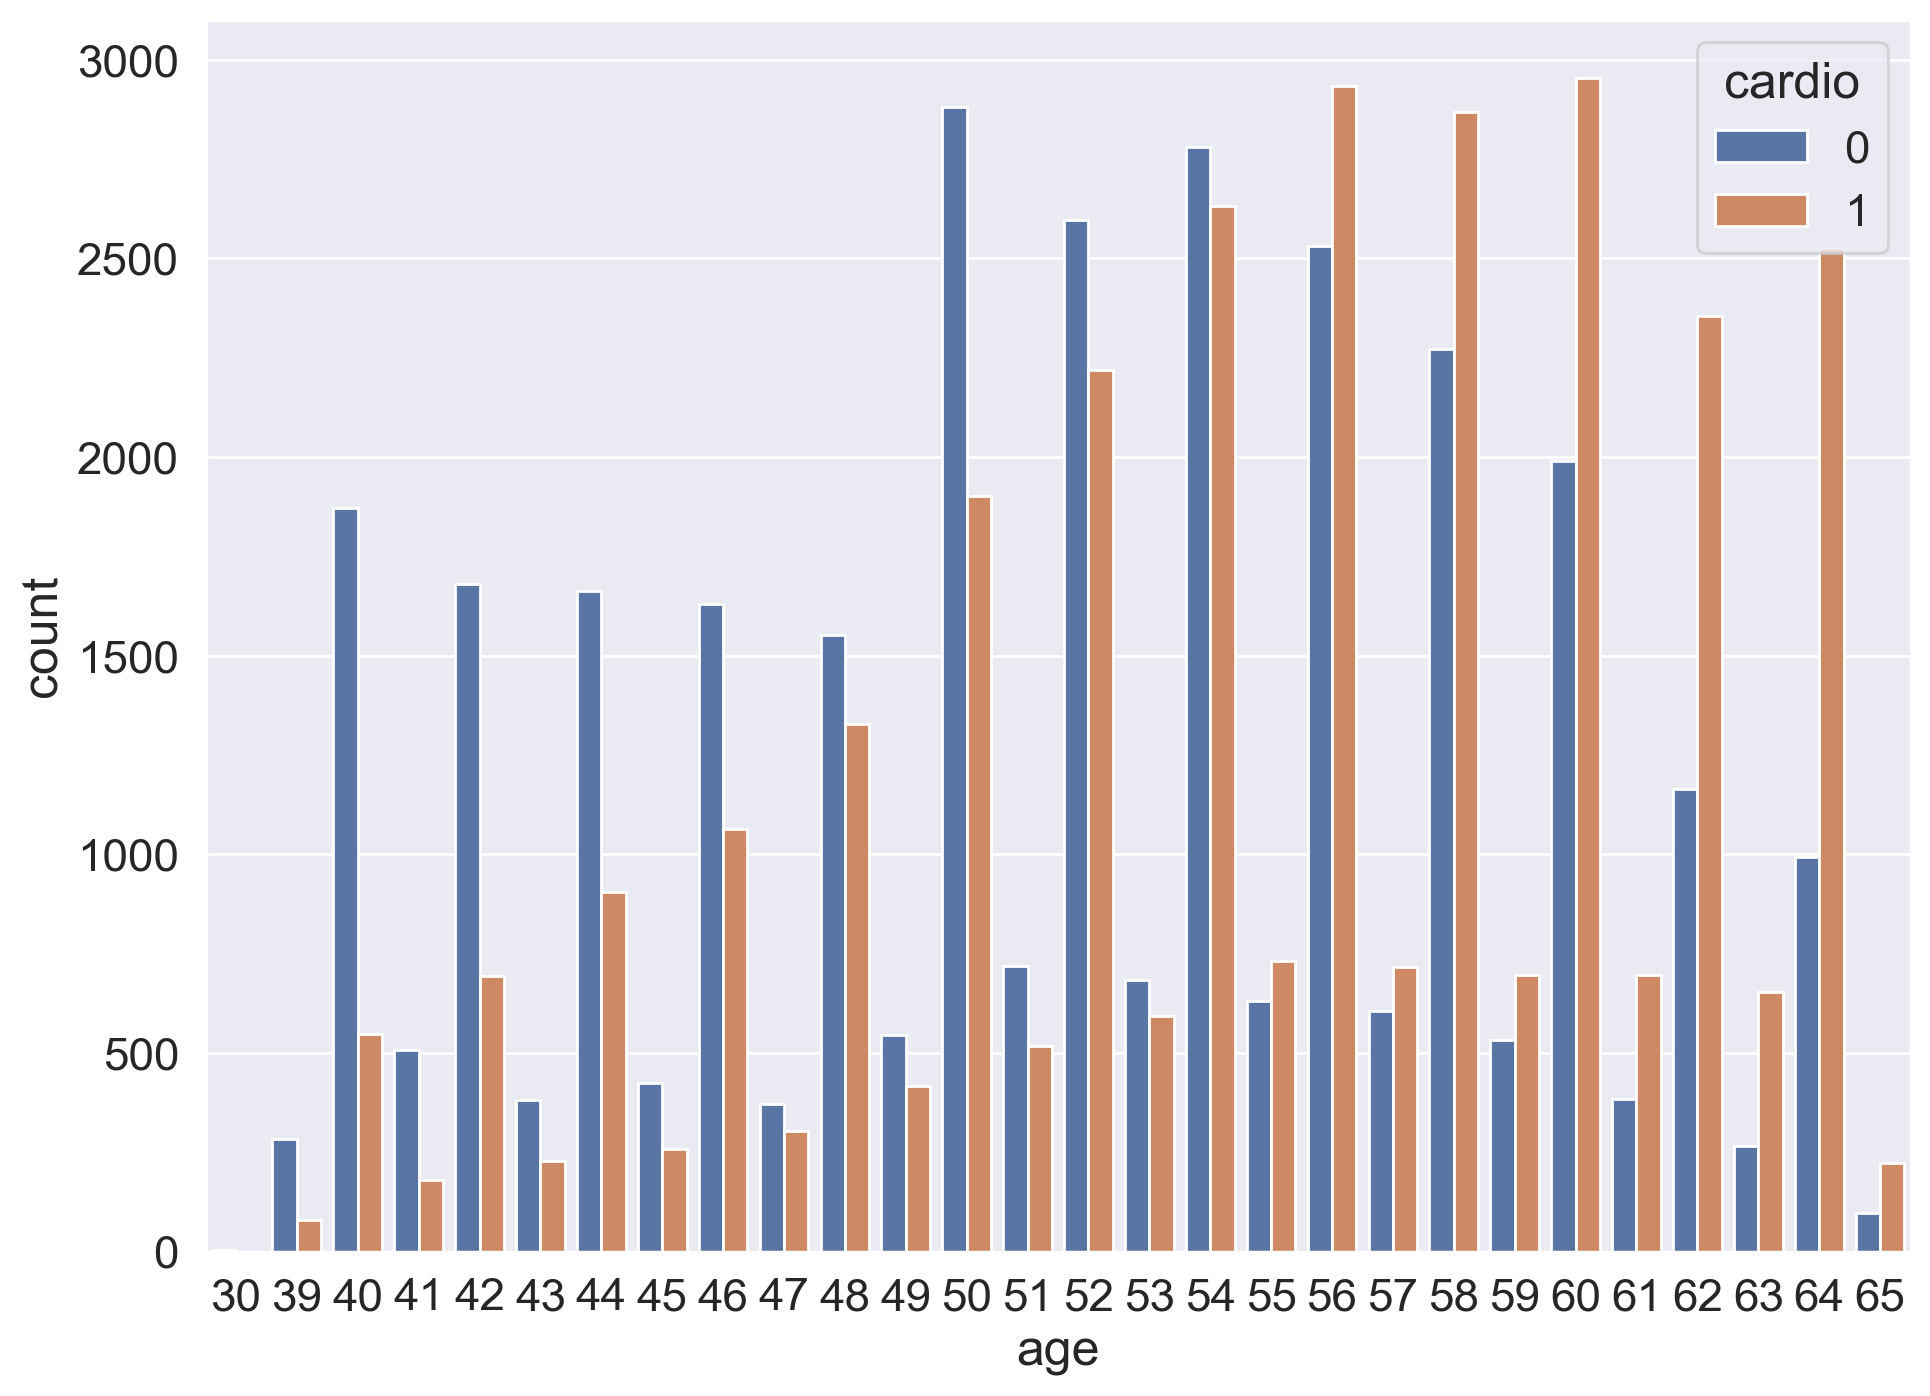

In [542]:
sns.countplot(x = round(df['age'].astype('int64')), hue = df['cardio'])
sns.set(rc={'figure.figsize':(11.7,5)})
#55